In [1]:
!nvidia-smi

Fri May 20 07:34:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3090    Off  | 00000000:01:00.0 Off |                  N/A |
| 33%   61C    P2   168W / 370W |   4061MiB / 24259MiB |     28%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import re
from PIL import Image
import shutil
import random
import matplotlib.pyplot as plt
import glob

In [3]:
print(tf.__version__)
print(keras.__version__)

2.6.2
2.6.0


In [4]:
data_dir = '../dataset/'
image_dir = f'{data_dir}images/'

In [5]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg'] 
len(image_files)

7378

In [6]:
for image_file in image_files:
    image_path = os.path.join(image_dir , image_file)
    image = Image.open(image_path)
    image_mode = image.mode
    if image_mode != 'RGB':
        print(image_file , image_mode)
        image = np.asarray(image)
        plt.imshow(image)
        print(image.shape)
        os.remove(image_path)

In [7]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg'] 
len(image_files)

7378

In [8]:
class_list = set()
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]
    class_name = re.sub('_\d+' ,'' , file_name)
    class_list.add(class_name)
class_list = list(class_list)
print(len(class_list))

37


In [9]:
class_list.sort()
class_list

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [10]:
class2idx = {cls:idx for idx , cls in enumerate(class_list)}
class2idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [11]:
class2idx['Bengal']

1

In [12]:
image_files = sorted(image_files)
image_files

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

In [13]:
## trian , validation directory 생성
train_dir = data_dir + 'train'
val_dir = data_dir + 'val'
os.makedirs(train_dir , exist_ok = True)
os.makedirs(val_dir , exist_ok = True)

In [14]:
!tree -d ..

..
├── dataset
│   ├── annotations
│   │   ├── trimaps
│   │   └── xmls
│   ├── images
│   ├── tfrecord
│   ├── train
│   └── val
└── script

9 directories


In [15]:
cnt = 0 
previous_class = ""
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]
    class_name = re.sub('_\d+' , '' , file_name)
    if class_name == previous_class:
        cnt += 1
    else:
        cnt = 1
    if cnt <= 160:
        cpath = train_dir
    else:
        cpath = val_dir
    image_path = os.path.join(image_dir , image_file)
    shutil.copy(image_path , cpath)
    previous_class = class_name

In [16]:
train_images = os.listdir(train_dir)
val_images = os.listdir(val_dir)

print(f' train images length: {len(train_images)} \n val images length :{len(val_images)}')

 train images length: 5920 
 val images length :1458


In [17]:
train_images[:5]

['great_pyrenees_136.jpg',
 'Persian_221.jpg',
 'staffordshire_bull_terrier_103.jpg',
 'havanese_15.jpg',
 'Maine_Coon_24.jpg']

In [18]:
val_images[:5]

['japanese_chin_90.jpg',
 'english_setter_97.jpg',
 'japanese_chin_96.jpg',
 'Sphynx_66.jpg',
 'american_pit_bull_terrier_98.jpg']

In [19]:
IMG_SIZE = 224

In [20]:
tfr_dir = os.path.join(data_dir , 'tfrecord')
os.makedirs(tfr_dir , exist_ok = True)

tfr_train_dir = os.path.join(tfr_dir , 'cls_train.tfr')
tfr_val_dir = os.path.join(tfr_dir , 'cls_val.tfr')

In [21]:
## TFRecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
writer_val = tf.io.TFRecordWriter(tfr_val_dir)

In [22]:
def _bytes_feature(value):
    '''Returns a bytes_list from a string( / byte.'''
    if isinstance(value , type(tf.constant(0))):
        value = value.numpy()
    return tf.train.Feature(bytes_list = tf.train.BytesList(value = [value]))

def _float_feature(value):
    '''Returns a float_list from a float / dobule.'''
    return tf.train.Feature(float_list = tf.train.Floatlist(value = [value]))

def _int64_feature(value):
    '''Returns an int64_list from bool / enum / int / uint.'''
    return tf.train.Feature(int64_list = tf.train.Int64List(value = [value]))

In [23]:
### traindata로 tfrecord 만들기
n_train = 0

train_files = os.listdir(train_dir)
for train_file in train_files:
    train_path = os.path.join(train_dir , train_file)
    image = Image.open(train_path)
    image = image.resize((IMG_SIZE ,IMG_SIZE))
    bimage = image.tobytes()
    
    file_name = os.path.splitext(train_file)[0]
    class_name = re.sub('_\d+' , '', file_name)
    class_num = class2idx[class_name]
    
    example = tf.train.Example(features = tf.train.Features(feature =  {
        'image' : _bytes_feature(bimage) , 
        'cls_num' : _int64_feature(class_num) 
    }))
    writer_train.write(example.SerializePartialToString())
    n_train += 1
writer_train.close()
print(n_train)

2022-05-20 07:35:02.848072: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-20 07:35:03.214939: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 18251 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


5920


In [24]:
### valdata로 tfrecord 만들기
n_val = 0

val_files = os.listdir(val_dir)
for val_file in val_files:
    val_path = os.path.join(val_dir , val_file)
    image = Image.open(val_path)
    image = image.resize((IMG_SIZE ,IMG_SIZE))
    bimage = image.tobytes()
    
    file_name = os.path.splitext(val_file)[0]
    class_name = re.sub('_\d+' , '', file_name)
    class_num = class2idx[class_name]
    
    example = tf.train.Example(features = tf.train.Features(feature =  {
        'image' : _bytes_feature(bimage) , 
        'cls_num' : _int64_feature(class_num) 
    }))
    writer_val.write(example.SerializePartialToString())
    n_val += 1
writer_val.close()
print(n_val)

1458


In [25]:
N_CLASS = len(class_list)
N_EPOCHS = 20
N_BATCH = 40
N_TRAIN= n_train
N_VAL = n_val
IMG_SIZE = 224
learning_rate = 0.0001
step_per_epoch = N_TRAIN / N_BATCH
validation_steps = int(np.ceil(N_VAL / N_BATCH))

In [26]:
## tfrecord file을 data로 parsing 해주는 function
def _parse_function(tfrecord_serialized):
    features = { 'image' : tf.io.FixedLenFeature([] , tf.string) , 
                  'cls_num' : tf.io.FixedLenFeature([] , tf.int64)
                }
    parsed_features = tf.io.parse_single_example(tfrecord_serialized , features)
    
    image = tf.io.decode_raw(parsed_features['image'] , tf.uint8)
    image = tf.reshape(image , [IMG_SIZE , IMG_SIZE  , 3])
    image = tf.cast(image  , tf.float32)  / 255.
    
    label = tf.cast(parsed_features['cls_num'] , tf.int64)
    
    return image , label

In [27]:
## train dataset 만들기
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function , num_parallel_calls = tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(N_TRAIN).prefetch(
    tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()

In [28]:
## val dataset 만들기
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function , num_parallel_calls = tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

2022-05-20 07:35:31.401721: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


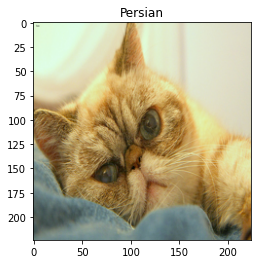

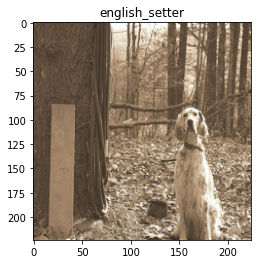

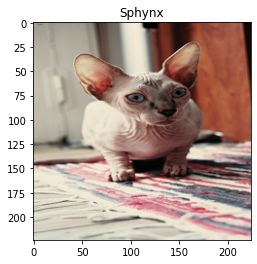

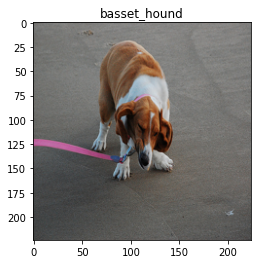

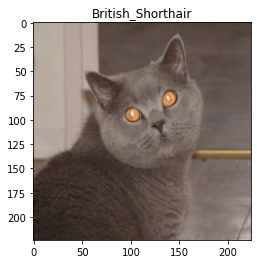

In [29]:
for image , label in train_dataset.take(5):
    plt.imshow(image[0])
    title = class_list[label[0].numpy()]
    plt.title(title)
    plt.show()

In [30]:
def create_model():
    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(32 , 3, activation = 'relu' , padding = 'SAME' , input_shape = (IMG_SIZE , IMG_SIZE , 3)))
    model.add(keras.layers.MaxPool2D(padding = 'SAME'))
    model.add(keras.layers.Conv2D(64 , 3, activation = 'relu' , padding = 'SAME'))
    model.add(keras.layers.MaxPool2D(padding = 'SAME'))
    model.add(keras.layers.Conv2D(128 , 3, activation = 'relu' , padding = 'SAME'))
    model.add(keras.layers.MaxPool2D(padding = 'SAME'))
    model.add(keras.layers.Conv2D(256 , 3, activation = 'relu' , padding = 'SAME')) 
    model.add(keras.layers.MaxPool2D(padding = 'SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024 , activation = 'relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(N_CLASS , activation = 'softmax'))
    return model


In [31]:
model = create_model()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate) , 
              loss = 'sparse_categorical_crossentropy' , 
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [32]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Physical devices cannot be modified after being initialized


In [33]:
history = model.fit(
    train_dataset,
    epochs = N_EPOCHS , 
    steps_per_epoch = step_per_epoch , 
    validation_data = val_dataset , 
    validation_steps= validation_steps)

Epoch 1/20


2022-05-20 07:35:33.939855: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2022-05-20 07:35:35.102011: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


148/148 [==============================] - 8s 35ms/step - loss: 3.5749 - accuracy: 0.0437 - val_loss: 3.4424 - val_accuracy: 0.0919
Epoch 2/20
148/148 [==============================] - 5s 30ms/step - loss: 3.2377 - accuracy: 0.1204 - val_loss: 3.1019 - val_accuracy: 0.1488
Epoch 3/20
148/148 [==============================] - 5s 32ms/step - loss: 2.9312 - accuracy: 0.1856 - val_loss: 2.9388 - val_accuracy: 0.1872
Epoch 4/20
148/148 [==============================] - 5s 32ms/step - loss: 2.6376 - accuracy: 0.2606 - val_loss: 2.8493 - val_accuracy: 0.2010
Epoch 5/20
148/148 [==============================] - 5s 30ms/step - loss: 2.3049 - accuracy: 0.3569 - val_loss: 2.8339 - val_accuracy: 0.2215
Epoch 6/20
148/148 [==============================] - 5s 30ms/step - loss: 1.9118 - accuracy: 0.4556 - val_loss: 2.8991 - val_accuracy: 0.2257
Epoch 7/20
148/148 [==============================] - 5s 30ms/step - loss: 1.4446 - accuracy: 0.5785 - val_loss: 3.0369 - val_accuracy: 0.2373
Epoch 8/20

In [35]:
def create_bn_model():
    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(32 , 3,  padding = 'SAME' , input_shape = (IMG_SIZE , IMG_SIZE , 3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding = 'SAME'))
    model.add(keras.layers.Conv2D(64 , 3,  padding = 'SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding = 'SAME'))
    model.add(keras.layers.Conv2D(128 , 3,  padding = 'SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding = 'SAME'))
    model.add(keras.layers.Conv2D(256 , 3,  padding = 'SAME')) 
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding = 'SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024 ))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(N_CLASS , activation = 'softmax'))
    return model


In [45]:
model = create_bn_model()

lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = learning_rate , 
                                                          decay_steps = step_per_epoch * 5 , 
                                                          decay_rate = 0.5 , 
                                                          staircase = True)

model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule) , 
              loss = 'sparse_categorical_crossentropy'  , 
              metrics = ['accuracy'] )
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
re_lu_24 (ReLU)              (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_25 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_25 (ReLU)              (None, 112, 112, 64)     

In [46]:
history = model.fit(
    train_dataset,
    epochs = N_EPOCHS , 
    steps_per_epoch = step_per_epoch , 
    validation_data = val_dataset , 
    validation_steps= validation_steps)

Epoch 1/20
148/148 [==============================] - 7s 43ms/step - loss: 13.5829 - accuracy: 0.0706 - val_loss: 10.3991 - val_accuracy: 0.0412
Epoch 2/20
148/148 [==============================] - 6s 39ms/step - loss: 7.5241 - accuracy: 0.1515 - val_loss: 7.3169 - val_accuracy: 0.0473
Epoch 3/20
148/148 [==============================] - 6s 39ms/step - loss: 6.1908 - accuracy: 0.2025 - val_loss: 8.5375 - val_accuracy: 0.0864
Epoch 4/20
148/148 [==============================] - 6s 39ms/step - loss: 4.7941 - accuracy: 0.2718 - val_loss: 6.2418 - val_accuracy: 0.1406
Epoch 5/20
148/148 [==============================] - 7s 43ms/step - loss: 3.8435 - accuracy: 0.3429 - val_loss: 6.0709 - val_accuracy: 0.1523
Epoch 6/20
148/148 [==============================] - 6s 39ms/step - loss: 1.8787 - accuracy: 0.5483 - val_loss: 4.4209 - val_accuracy: 0.2181
Epoch 7/20
148/148 [==============================] - 7s 42ms/step - loss: 1.3338 - accuracy: 0.6426 - val_loss: 4.8358 - val_accuracy: 0.20

In [47]:
from tensorflow.keras import models
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Conv2D , ReLU , MaxPool2D , Dense , BatchNormalization , GlobalAvgPool2D

In [48]:
mobilenetv2 = MobileNetV2(weights = 'imagenet' , include_top = False , input_shape = (IMG_SIZE , IMG_SIZE , 3))

9420800/9406464 [==============================] - 0s 0us/step


In [49]:
mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [50]:
def create_mv_model():
    model = models.Sequential()
    model.add(mobilenetv2)
    model.add(GlobalAvgPool2D())
    model.add(Dense(N_CLASS , activation = 'softmax'))
    return model

In [53]:
model = create_mv_model()

lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate= learning_rate  , 
                                                          decay_steps= step_per_epoch * 5 , 
                                                           decay_rate = 0.5 , 
                                                           staircase = True)
model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),  
             loss = 'sparse_categorical_crossentropy' , 
              metrics =['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 37)                47397     
Total params: 2,305,381
Trainable params: 2,271,269
Non-trainable params: 34,112
_________________________________________________________________


In [54]:
history = model.fit(
    train_dataset,
    epochs = N_EPOCHS , 
    steps_per_epoch = step_per_epoch , 
    validation_data = val_dataset , 
    validation_steps= validation_steps)

Epoch 1/20
148/148 [==============================] - 26s 155ms/step - loss: 1.1480 - accuracy: 0.7123 - val_loss: 0.7105 - val_accuracy: 0.7682
Epoch 2/20
148/148 [==============================] - 22s 149ms/step - loss: 0.2365 - accuracy: 0.9375 - val_loss: 0.5383 - val_accuracy: 0.8162
Epoch 3/20
148/148 [==============================] - 22s 147ms/step - loss: 0.1027 - accuracy: 0.9794 - val_loss: 0.4263 - val_accuracy: 0.8471
Epoch 4/20
148/148 [==============================] - 22s 149ms/step - loss: 0.0497 - accuracy: 0.9949 - val_loss: 0.3737 - val_accuracy: 0.8772
Epoch 5/20
148/148 [==============================] - 23s 150ms/step - loss: 0.0317 - accuracy: 0.9966 - val_loss: 0.3128 - val_accuracy: 0.8930
Epoch 6/20
148/148 [==============================] - 22s 149ms/step - loss: 0.0189 - accuracy: 0.9985 - val_loss: 0.2905 - val_accuracy: 0.9053
Epoch 7/20
148/148 [==============================] - 22s 147ms/step - loss: 0.0149 - accuracy: 0.9993 - val_loss: 0.2612 - val_ac